A reta de melhor ajuste é:  y = 10.8503x + 2.7271


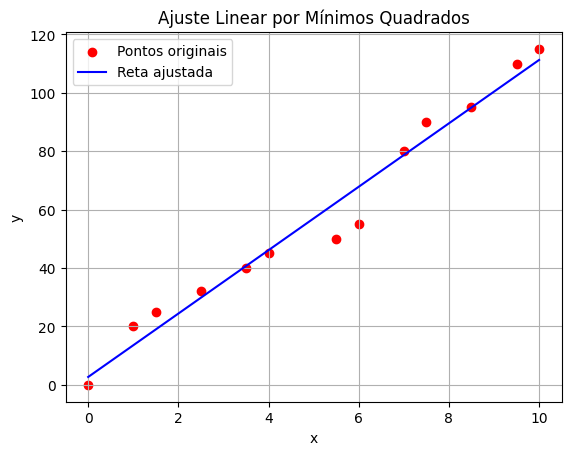

In [2]:
import copy
import matplotlib.pyplot as plt

def gaussian_elimination(A, b, tol=1e-12):
    n = len(A)
    A = copy.deepcopy(A)
    b = copy.deepcopy(b)

    # Eliminação para triangular superior
    for k in range(n):
        pivot_row = max(range(k, n), key=lambda i: abs(A[i][k]))
        if abs(A[pivot_row][k]) < tol:
            raise ValueError(f"Pivô muito pequeno em coluna {k}: {A[pivot_row][k]:.3e}")
        if pivot_row != k:
            A[k], A[pivot_row] = A[pivot_row], A[k]
            b[k], b[pivot_row] = b[pivot_row], b[k]
        for i in range(k+1, n):
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= factor * A[k][j]
            b[i] -= factor * b[k]

    # Substituição reversa
    x = [0] * n
    for i in reversed(range(n)):
        s = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - s) / A[i][i]
    return x

if __name__ == "__main__":
    # 1) Dados do exercício
    pontos = [(0, 0), (1, 20), (1.5, 25), (2.5, 32), (3.5, 40),
        (4.0, 45), (5.5, 50), (6.0, 55), (7.0, 80),
        (7.5, 90), (8.5, 95), (9.5, 110), (10, 115)]

    # 2) Monta as somas para as equações normais
    n = len(pontos)
    Sx = Sy = Sxx = Sxy = 0.0
    for x, y in pontos:
        Sx  += x
        Sy  += y
        Sxx += x * x
        Sxy += x * y

    # 3) Constrói o sistema normal
    A = [
        [Sxx, Sx],
        [Sx,  n ]
    ]
    B = [Sxy, Sy]

    # 4) Resolve o sistema
    m, b0 = gaussian_elimination(A, B)
    print(f"A reta de melhor ajuste é:  y = {m:.4f}x + {b0:.4f}")

    # 5) Plota o gráfico corretamente
    xs = [x for x, y in pontos]
    ys = [y for x, y in pontos]

    # pontos originais
    plt.scatter(xs, ys, color='red', label='Pontos originais')

    # reta ajustada: pega o mínimo e máximo de x para desenhar a linha
    x_line = [min(xs), max(xs)]
    y_line = [m * xi + b0 for xi in x_line]
    plt.plot(x_line, y_line, color='blue', label='Reta ajustada')

    plt.title('Ajuste Linear por Mínimos Quadrados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()




## Ajuste Linear por Mínimos Quadrados

O ajuste linear por mínimos quadrados é um método estatístico usado para encontrar a reta que melhor se ajusta a um conjunto de pontos experimentais. Esse método é amplamente utilizado em diversas áreas, como física, engenharia, economia e ciência de dados, quando se deseja modelar a relação entre duas variáveis com uma equação do tipo reta.

A ideia principal do método é minimizar a soma dos quadrados dos erros (ou resíduos), que são as diferenças entre os valores observados (os pontos experimentais) e os valores previstos pela reta. A equação da reta é:

**y = a * x + b**

onde:
- **a** é o coeficiente angular (inclinação da reta),
- **b** é o coeficiente linear (intercepto com o eixo y).

Para encontrar os valores de **a** e **b** que melhor se ajustam aos dados, usamos as seguintes fórmulas:

**a = (n * Σ(xy) - Σx * Σy) / (n * Σ(x²) - (Σx)²)**  
**b = (Σy - a * Σx) / n**

onde:
- **n** é o número de pontos,
- **Σ** representa a soma de todos os valores indicados.

Com esses coeficientes, obtemos a equação da reta que melhor representa a tendência dos dados. Este tipo de ajuste é chamado de "mínimos quadrados" porque minimiza o valor total de (y - y_ajustado)², ou seja, os desvios ao quadrado entre os dados reais e os valores previstos pela reta.

O resultado é uma aproximação linear que pode ser usada para prever valores, identificar tendências ou simplificar a análise de um conjunto de dados.

Este método só é adequado quando os dados seguem uma tendência aproximadamente linear. Se os dados apresentarem uma curvatura acentuada, outras técnicas de ajuste não lineares devem ser consideradas.

OBS: DEVE-SE ALTERAR APENAS OS PONTOS PARA ESSE CODIGO.

pontos = [(0, 0), (1, 20), (1.5, 25), (2.5, 32), (3.5, 40), (4.0, 45), (5.5, 50), (6.0, 55), (7.0, 80), (7.5, 90), (8.5, 95), (9.5, 110), (10, 115)]